In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# A. Methods

This section contains methods required for generating the plots.

In [3]:
def autolabel1(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2.,1.4*height,
                '%d' % int(height),
                ha='center', va='top', weight='bold', rotation=90)
        
        
def autolabel2(rects, row):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax[row].text(rect.get_x() + rect.get_width() / 2., 1.4 * height,
                '%d' % int(height),
                ha='center', va='top', weight='bold', rotation=90)

In [4]:
def _get_share_ax(share_var, axarr, row, col):
    if share_var=='row':
        if col > 0:
            return axarr[row, col-1]
        return None
    elif share_var=='col':
        if row > 0:
            return axarr[row-1, col]
        return None
    elif share_var and (col>0 or row>0):
        return axarr[0,0]
    return None

def subplots_with_row_titles(nrows, ncols, row_titles=None, row_title_kw=None, sharex=False, sharey=False, subplot_kw=None, grid_spec_kw=None, **fig_kw):
    """
    Creates a figure and array of axes with a title for each row.
    
    Parameters
    ----------
    nrows, ncols : int
        Number of rows/columns of the subplot grid
    row_titles : list, optional
        List of titles for each row. If included, there must be one title for each row.
    row_title_kw: dict, optional
        Dict with kewords passed to the `~matplotlib.Axis.set_title` function.
        A common use is row_title_kw={'fontsize': 24}
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:

        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.

        When subplots have a shared x-axis along a column, only the x tick
        labels of the bottom subplot are created. Similarly, when subplots
        have a shared y-axis along a row, only the y tick labels of the first
        column subplot are created. To later turn other subplots' ticklabels
        on, use `~matplotlib.axes.Axes.tick_params`.
    subplot_kw : dict, optional
        Dict with keywords passed to the
        `~matplotlib.figure.Figure.add_subplot` call used to create each
        subplot.
    gridspec_kw : dict, optional
        Dict with keywords passed to the `~matplotlib.gridspec.GridSpec`
        constructor used to create the grid the subplots are placed on.
    **fig_kw
        All additional keyword arguments are passed to the
        `.pyplot.figure` call.
    """
    if row_titles is not None and len(row_titles) != nrows:
        raise ValueError(f'If row_titles is specified, there must be one for each row. Got={row_titles}')
    if subplot_kw is None:
        subplot_kw = {}
    if row_title_kw is None:
        row_title_kw = {}
    if sharex not in {True, False, 'row', 'col'}:
        raise ValueError(f'sharex must be one of [True, False, "row", "col"]. Got={sharex}')
    if sharey not in {True, False, 'row', 'col'}:
        raise ValueError(f'sharey must be one of [True, False, "row", "col"]. Got={sharey}')
        
    fig, big_axes = plt.subplots(nrows, 1, **fig_kw)
    for (row, big_ax) in enumerate(big_axes):
        if row_titles is not None:
            big_ax.set_title(str(row_titles[row]), **row_title_kw)
        big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
        big_ax._frameon = False
        
    axarr = np.empty((nrows, ncols), dtype='O')
    for row in range(nrows):
        for col in range(ncols):
            sharex_ax = _get_share_ax(sharex, axarr, row, col)
            sharey_ax = _get_share_ax(sharex, axarr, row, col)
    
            ax= fig.add_subplot(nrows, ncols, row*ncols+col+1,
                                sharex=sharex_ax, sharey=sharey_ax, **subplot_kw)
            axarr[row, col] = ax
    return fig, axarr       

# B. Efficiency and Blocking Pairs

This section contains the analysis of the efficency experiment.

## 1. Reading from results directory

In [5]:
n = [20, 40, 60, 80, 100]

fix = []
shuffle = []
fix_w = []
shuffle_w = []

#Fix
for num in n:
    df_results_fix = pd.read_csv(f'./results/Fix/data/data_fix_n{num}.csv')
    df_results_fix['rel_Profit_Performance'] = (df_results_fix.Sum_Profit / df_results_fix.Sum_Max_Possible_Profit)
    df_results_fix['rel_ETA_Performance'] = (df_results_fix.Sum_Min_Possible_ETA / df_results_fix.Sum_ETA)
    df_results_fix['n'] = num
    df_results_fix['Alg'] =  ['F' + x.strip()[-1] + y.strip()[0] for x, y in zip(df_results_fix['ALG'], df_results_fix['Optimum'])]
    fix.append(df_results_fix)
    df_results_fix.to_csv(f'./results/Fix/data/data_fix_n{num}.csv',index=False)

#Shuffle
for num in n:
    df_results_shuffle = pd.read_csv(f'./results/Shuffle/data/data_shuffle_n{num}.csv')
    df_results_shuffle['rel_Profit_Performance'] = (df_results_shuffle.Sum_Profit / df_results_shuffle.Sum_Max_Possible_Profit)
    df_results_shuffle['rel_ETA_Performance'] = (df_results_shuffle.Sum_Min_Possible_ETA / df_results_shuffle.Sum_ETA)
    df_results_shuffle['n'] = num
    df_results_shuffle['Alg'] =  ['S' + x.strip()[-1] + y.strip()[0] for x, y in zip(df_results_shuffle['ALG'], df_results_shuffle['Optimum'])]
    shuffle.append(df_results_shuffle)
    df_results_shuffle.to_csv(f'./results/Shuffle/data/data_shuffle_n{num}.csv',index=False)
    
#Waiting fix
for num in n:
    df_results_fix_w = pd.read_csv(f'./results/Fix/data/data_fix_waiting_n{num}.csv')
    df_results_fix_w['rel_Profit_Performance'] = (df_results_fix_w.Sum_Profit / df_results_fix_w.Sum_Max_Possible_Profit)
    df_results_fix_w['rel_ETA_Performance'] = (df_results_fix_w.Sum_Min_Possible_ETA / df_results_fix_w.Sum_ETA)
    df_results_fix_w['n'] = num
    df_results_fix_w['Alg'] =  ['F' + x.strip()[-1] + y.strip()[0] for x, y in zip(df_results_fix_w['ALG'], df_results_fix_w['Optimum'])]
    fix_w.append(df_results_fix_w)
    df_results_fix_w.to_csv(f'./results/Fix/data/data_fix_waiting_n{num}.csv',index=False)
#Waiting shuffle 
for num in n:
    df_results_shuffle_w = pd.read_csv(f'./results/Shuffle/data/data_shuffle_waiting_n{num}.csv')
    df_results_shuffle_w['rel_Profit_Performance'] = (df_results_shuffle_w.Sum_Profit / df_results_shuffle_w.Sum_Max_Possible_Profit)
    df_results_shuffle_w['rel_ETA_Performance'] = (df_results_shuffle_w.Sum_Min_Possible_ETA / df_results_shuffle_w.Sum_ETA)
    df_results_shuffle_w['n'] = num
    df_results_shuffle_w['Alg'] =  ['S' + x.strip()[-1] + y.strip()[0] for x, y in zip(df_results_shuffle_w['ALG'], df_results_shuffle_w['Optimum'])]
    shuffle_w.append(df_results_shuffle_w)
    df_results_shuffle_w.to_csv(f'./results/Shuffle/data/data_shuffle_waiting_n{num}.csv',index=False)

## 2. Summarizing and grouping the performance criteria

In [6]:
#FIX order without waiting time
summary_fix = pd.DataFrame()
series = pd.Series()

for num in n:
    df_results_fix = pd.read_csv(f'./results/Fix/data/data_fix_n{num}.csv')
    df_results_fix = df_results_fix.query("Alg in ('F1P','F2P')")
    summary_fix = summary_fix.append(pd.concat([df_results_fix.groupby('Alg')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA', 'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
                       df_results_fix.groupby('Alg')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Blocking Pairs']].min(),
                       df_results_fix.groupby('Alg')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Blocking Pairs']].max()
                        ],axis=1, ignore_index=True))
    summary_fix['Alg'] = summary_fix.index
    series = series.append(pd.Series([num]*2)) #change to 4 if ID filter removed
    
#Rename Alg Column values according to naming in paper
summary_fix.loc[(summary_fix.Alg == 'F1P'),'Alg']='AlgD'
summary_fix.loc[(summary_fix.Alg == 'F2P'),'Alg']='AlgT'

summary_fix = pd.concat([series.reset_index(drop=True),summary_fix.reset_index(drop=True)], axis=1)
summary_fix = summary_fix.set_axis(['n=','avg_Profit_Performance', 'avg_ETA_Performance', 'avg_ETA', 'avg_Optimal_ETA','avg_Blocking_Pairs',
                      'min_Profit_Performance', 'min_ETA_Performance','min_Blocking_Pairs',
                      'max_Profit_Performance','max_ETA_Performance','max_Blocking_Pairs','Alg'], axis=1, inplace=False)

summary_fix.to_csv(f'./results/summary_fix.csv')

/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/1040818302.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series()
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/1040818302.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_fix = summary_fix.append(pd.concat([df_results_fix.groupby('Alg')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA', 'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/1040818302.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(pd.Series([num]*2)) #change to 4 if ID filter removed
/var/folders/zh/lgmwpjxd5fb9gvz53xj

In [7]:
#SHUFFLE order without waiting time
summary_shuffle = pd.DataFrame()
series = pd.Series()


for num in n:
    df_results_shuffle = pd.read_csv(f'./results/Shuffle/data/data_shuffle_n{num}.csv')
    df_results_shuffle = df_results_shuffle.query("Alg in ('S1P','S2P')")
    summary_shuffle = summary_shuffle.append(pd.concat([df_results_shuffle.groupby('Alg')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA', 'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
                       df_results_shuffle.groupby('Alg')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Blocking Pairs']].min(),
                       df_results_shuffle.groupby('Alg')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Blocking Pairs']].max()
                        ],axis=1, ignore_index=True))
    summary_shuffle['Alg'] = summary_shuffle.index
    series = series.append(pd.Series([num]*2)) #change to 4 if ID filter removed
    
#Rename Alg Column values according to naming in paper
summary_shuffle.loc[(summary_shuffle.Alg == 'F1P'),'Alg']='AlgD'
summary_shuffle.loc[(summary_shuffle.Alg == 'F2P'),'Alg']='AlgT'
    
summary_shuffle = pd.concat([series.reset_index(drop=True),summary_shuffle.reset_index(drop=True)], axis=1)
summary_shuffle = summary_shuffle.set_axis(['n=','avg_Profit_Performance', 'avg_ETA_Performance', 'avg_ETA', 'avg_Optimal_ETA','avg_Blocking_Pairs',
                      'min_Profit_Performance', 'min_ETA_Performance','min_Blocking_Pairs',
                      'max_Profit_Performance','max_ETA_Performance','max_Blocking_Pairs','Alg'], axis=1, inplace=False)

summary_shuffle.to_csv(f'./results/summary_shuffle.csv')

/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/3885721147.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series()
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/3885721147.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_shuffle = summary_shuffle.append(pd.concat([df_results_shuffle.groupby('Alg')[['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA', 'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/3885721147.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(pd.Series([num]*2)) #change to 4 if ID filter removed
/var/folders/zh/lgmwpjx

In [8]:
# FIX order with WAITING time
summary_fix_w = pd.DataFrame()
series = pd.Series()

for num in n:
    df_results_fix_w = pd.read_csv(f'./results/Fix/data/data_fix_waiting_n{num}.csv')
    df_results_fix_w = df_results_fix_w.query("Alg in ('F1P','F2P')")
    summary_fix_w = summary_fix_w.append(pd.concat([df_results_fix_w.groupby('Alg')[
                                                        ['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA',
                                                         'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
                                                    df_results_fix_w.groupby('Alg')[
                                                        ['rel_Profit_Performance', 'rel_ETA_Performance',
                                                         'Blocking Pairs']].min(),
                                                    df_results_fix_w.groupby('Alg')[
                                                        ['rel_Profit_Performance', 'rel_ETA_Performance',
                                                         'Blocking Pairs']].max()
                                                    ], axis=1, ignore_index=True))
    summary_fix_w['Alg'] = summary_fix_w.index
    series = series.append(pd.Series([num] * 2))  # change to 4 if ID filter removed
    
#Rename Alg Column values according to naming in paper
summary_fix_w.loc[(summary_fix_w.Alg == 'F1P'),'Alg']='AlgD'
summary_fix_w.loc[(summary_fix_w.Alg == 'F2P'),'Alg']='AlgT'

summary_fix_w = pd.concat([series.reset_index(drop=True), summary_fix_w.reset_index(drop=True)], axis=1)
summary_fix_w = summary_fix_w.set_axis(
    ['n=', 'avg_Profit_Performance', 'avg_Utility_Performance', 'avg_Utility', 'avg_Optimal_Utility', 'avg_Blocking_Pairs',
     'min_Profit_Performance', 'min_Utility_Performance', 'min_Blocking_Pairs',
     'max_Profit_Performance', 'max_Utility_Performance', 'max_Blocking_Pairs', 'Alg'], axis=1, inplace=False)

summary_fix_w.to_csv(f'./results/summary_fix_utility.csv')

/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/1609535474.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series()
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/1609535474.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_fix_w = summary_fix_w.append(pd.concat([df_results_fix_w.groupby('Alg')[
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/1609535474.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(pd.Series([num] * 2))  # change to 4 if ID filter removed
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/1609535474.py:8: FutureWarning: The frame.append method is deprecated a

In [9]:
# SHUFFLE order with WAITING time
summary_shuffle_w = pd.DataFrame()
series = pd.Series()

for num in n:
    df_results_shuffle_w = pd.read_csv(f'./results/Shuffle/data/data_shuffle_n{num}.csv')
    df_results_shuffle_w = df_results_shuffle_w.query("Alg in ('S1P','S2P')")
    summary_shuffle_w = summary_shuffle_w.append(pd.concat([df_results_shuffle_w.groupby('Alg')[
                                                            ['rel_Profit_Performance', 'rel_ETA_Performance', 'Sum_ETA',
                                                             'Sum_Min_Possible_ETA', 'Blocking Pairs']].mean(),
                                                            df_results_shuffle_w.groupby('Alg')[
                                                            ['rel_Profit_Performance', 'rel_ETA_Performance',
                                                             'Blocking Pairs']].min(),
                                                            df_results_shuffle_w.groupby('Alg')[
                                                            ['rel_Profit_Performance', 'rel_ETA_Performance',
                                                             'Blocking Pairs']].max()
                                                            ], axis=1, ignore_index=True))
    summary_shuffle_w['Alg'] = summary_shuffle_w.index
    series = series.append(pd.Series([num] * 2))  # change to 4 if ID filter removed
    
#Rename Alg Column values according to naming in paper
summary_shuffle_w.loc[(summary_shuffle_w.Alg == 'F1P'),'Alg']='AlgD'
summary_shuffle_w.loc[(summary_shuffle_w.Alg == 'F2P'),'Alg']='AlgT'

summary_shuffle_w = pd.concat([series.reset_index(drop=True), summary_shuffle_w.reset_index(drop=True)], axis=1)
summary_shuffle_w = summary_shuffle_w.set_axis(
    ['n=', 'avg_Profit_Performance', 'avg_Utility_Performance', 'avg_Utility', 'avg_Optimal_Utility', 'avg_Blocking_Pairs',
     'min_Profit_Performance', 'min_Utility_Performance', 'min_Blocking_Pairs',
     'max_Profit_Performance', 'max_Utility_Performance', 'max_Blocking_Pairs', 'Alg'], axis=1, inplace=False)

summary_shuffle_w.to_csv(f'./results/summary_shuffle_utility.csv')

/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/997620615.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series()
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/997620615.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_shuffle_w = summary_shuffle_w.append(pd.concat([df_results_shuffle_w.groupby('Alg')[
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/997620615.py:19: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  series = series.append(pd.Series([num] * 2))  # change to 4 if ID filter removed
/var/folders/zh/lgmwpjxd5fb9gvz53xjt5zx00000gn/T/ipykernel_42024/997620615.py:8: FutureWarning: The frame.append method is depr

## 3. Profit Plots

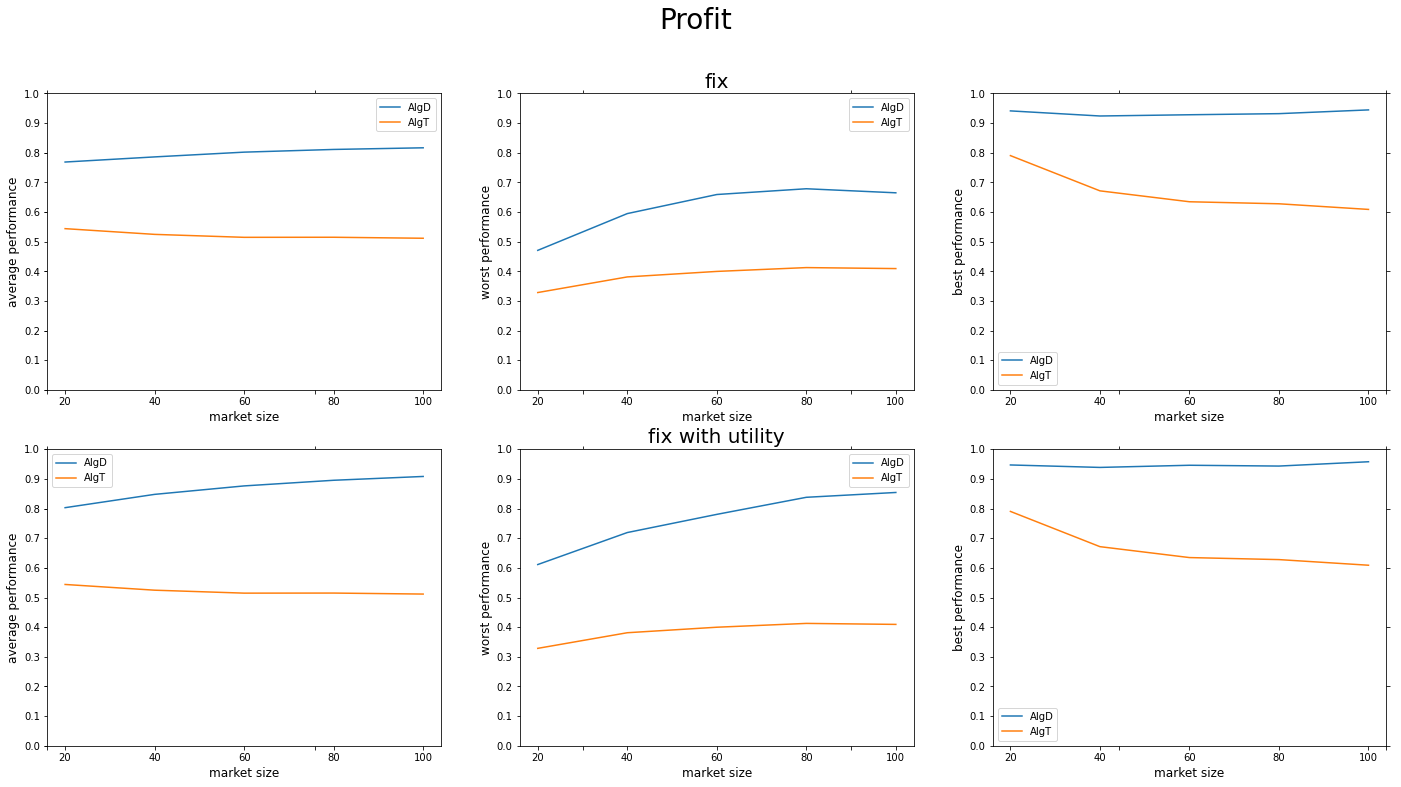

In [10]:
rows, cols = 2,3

#Change below for row titles
titles = ['fix', 
          #'Shuffle', 
          'fix with utility'
          #, 'Shuffle with utility'
         ]
fig, axarr = subplots_with_row_titles(rows, cols, figsize=(cols*8, rows*6), 
                                      row_titles=titles, 
                                      row_title_kw=dict(fontsize=20),
                                      sharex='row')

# Change below for main title
fig.suptitle('Profit',size=28)

summary_fix = pd.read_csv(f'./results/summary_fix.csv')
summary_fix_w = pd.read_csv(f'./results/summary_fix_utility.csv')

#Fix
sns.lineplot(ax=axarr[0,0], x = summary_fix['n='], y = summary_fix['avg_Profit_Performance'], hue=summary_fix['Alg'])
sns.lineplot(ax=axarr[0,1],x = summary_fix['n='], y = summary_fix['min_Profit_Performance'], hue=summary_fix['Alg'])
sns.lineplot(ax=axarr[0,2],x = summary_fix['n='], y = summary_fix['max_Profit_Performance'], hue=summary_fix['Alg'])

#Shuffle
#sns.lineplot(ax=axarr[1,0], x = summary_shuffle['n='], y = summary_shuffle['avg_Profit_Performance'], hue=summary_shuffle['ID'])
#sns.lineplot(ax=axarr[1,1],x = summary_shuffle['n='], y = summary_shuffle['min_Profit_Performance'], hue=summary_shuffle['ID'])
#sns.lineplot(ax=axarr[1,2],x = summary_shuffle['n='], y = summary_shuffle['max_Profit_Performance'], hue=summary_shuffle['ID'])

#Fix Waiting
sns.lineplot(ax=axarr[1,0], x = summary_fix_w['n='], y = summary_fix_w['avg_Profit_Performance'], hue=summary_fix_w['Alg'])
sns.lineplot(ax=axarr[1,1],x = summary_fix_w['n='], y = summary_fix_w['min_Profit_Performance'], hue=summary_fix_w['Alg'])
sns.lineplot(ax=axarr[1,2],x = summary_fix_w['n='], y = summary_fix_w['max_Profit_Performance'], hue=summary_fix_w['Alg'])

#Shuffle Waiting
#sns.lineplot(ax=axarr[3,0], x = summary_shuffle_w['n='], y = summary_shuffle_w['avg_Profit_Performance'], hue=summary_shuffle_w['ID'])
#sns.lineplot(ax=axarr[3,1],x = summary_shuffle_w['n='], y = summary_shuffle_w['min_Profit_Performance'], hue=summary_shuffle_w['ID'])
#sns.lineplot(ax=axarr[3,2],x = summary_shuffle_w['n='], y = summary_shuffle_w['max_Profit_Performance'], hue=summary_shuffle_w['ID'])

for row in range(rows):
    for col in range(cols):
        ax = axarr[row, col]
        ax.set_ylim([0,1])
        ax.set_xticks([20,40,60,80,100])
        ax.set_yticks(np.arange(0,1.1,0.1))
        #change below for x axis title
        ax.set_xlabel('market size',fontsize='large')
        if col == 0:
            #change below for y axis title of first column
            ax.set_ylabel('average performance',fontsize='large')
        elif col == 1:
            #change below for y axis title of second column
            ax.set_ylabel('worst performance',fontsize='large')
        elif col == 2:
            #change below for y axis title of third column
            ax.set_ylabel('best performance',fontsize='large')
        ax.legend()
        
plt.savefig(f'./results/profit.png')


## 4. ETA Plots

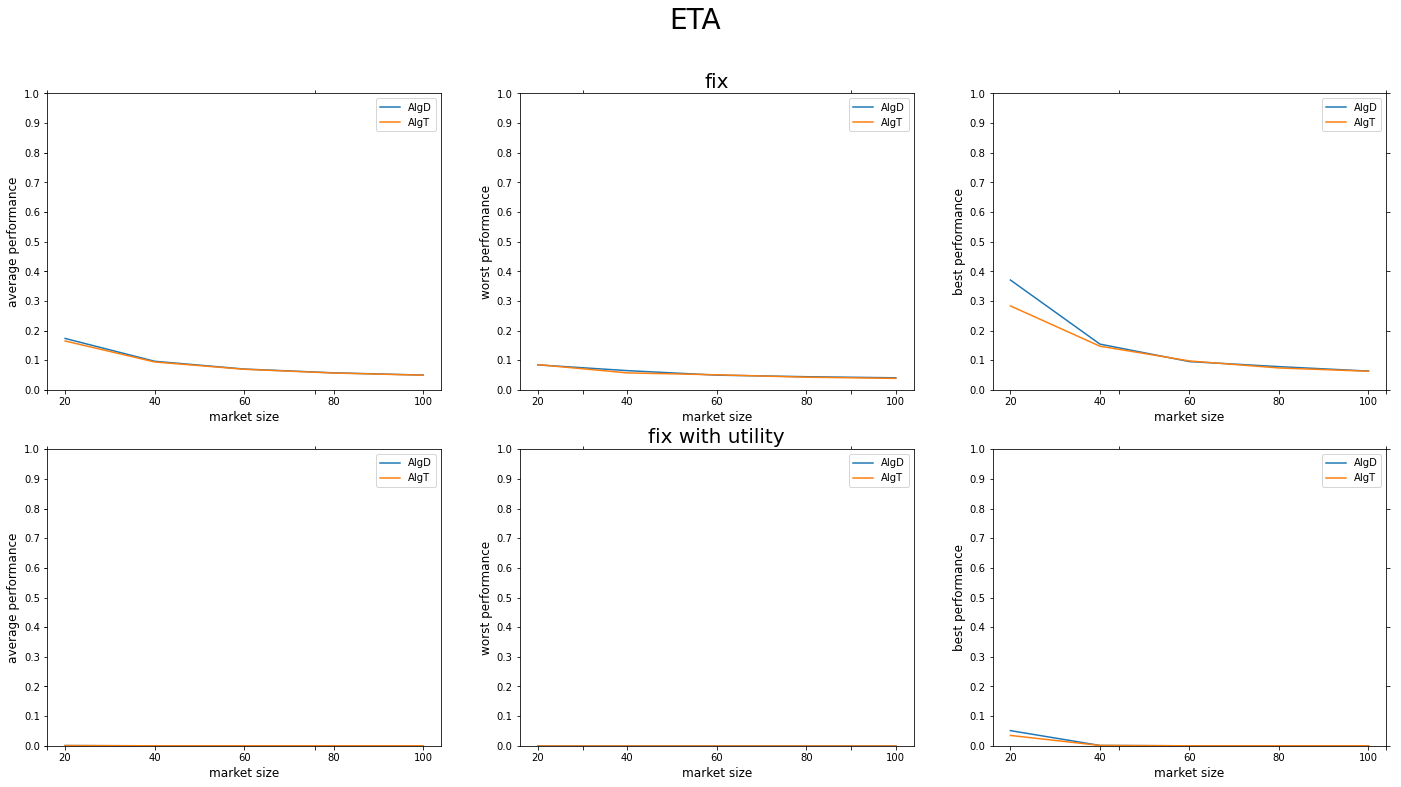

In [11]:
rows, cols = 2,3

#Change below for row titles
titles = ['fix', 
          #'Shuffle', 
          'fix with utility'
          #, 'Shuffle with utility'
         ]
fig, axarr = subplots_with_row_titles(rows, cols, figsize=(cols*8, rows*6), 
                                      row_titles=titles, 
                                      row_title_kw=dict(fontsize=20),
                                      sharex='row')

# Change below for main title
fig.suptitle('ETA',size=28)

#Fix
sns.lineplot(ax=axarr[0,0],x = summary_fix['n='], y = summary_fix['avg_ETA_Performance'], hue=summary_fix['Alg'])
sns.lineplot(ax=axarr[0,1],x = summary_fix['n='], y = summary_fix['min_ETA_Performance'], hue=summary_fix['Alg'])
sns.lineplot(ax=axarr[0,2],x = summary_fix['n='], y = summary_fix['max_ETA_Performance'], hue=summary_fix['Alg'])

#Shuffle
#sns.lineplot(ax=axarr[1,0], x = summary_shuffle['n='], y = summary_shuffle['avg_ETA_Performance'], hue=summary_shuffle['ID'])
#sns.lineplot(ax=axarr[1,1],x = summary_shuffle['n='], y = summary_shuffle['min_ETA_Performance'], hue=summary_shuffle['ID'])
#sns.lineplot(ax=axarr[1,2],x = summary_shuffle['n='], y = summary_shuffle['max_ETA_Performance'], hue=summary_shuffle['ID'])

#Fix Waiting
sns.lineplot(ax=axarr[1,0],x = summary_fix_w['n='], y = summary_fix_w['avg_Utility_Performance'], hue=summary_fix_w['Alg'])
sns.lineplot(ax=axarr[1,1],x = summary_fix_w['n='], y = summary_fix_w['min_Utility_Performance'], hue=summary_fix_w['Alg'])
sns.lineplot(ax=axarr[1,2],x = summary_fix_w['n='], y = summary_fix_w['max_Utility_Performance'], hue=summary_fix_w['Alg'])

#Shuffle Waiting
#sns.lineplot(ax=axarr[3,0], x = summary_shuffle_w['n='], y = summary_shuffle_w['avg_Utility_Performance'], hue=summary_shuffle_w['ID'])
#sns.lineplot(ax=axarr[3,1],x = summary_shuffle_w['n='], y = summary_shuffle_w['min_Utility_Performance'], hue=summary_shuffle_w['ID'])
#sns.lineplot(ax=axarr[3,2],x = summary_shuffle_w['n='], y = summary_shuffle_w['max_Utility_Performance'], hue=summary_shuffle_w['ID'])


for row in range(rows):
    for col in range(cols):
        ax = axarr[row, col]
        ax.set_ylim([0,1])
        ax.set_xticks([20,40,60,80,100])
        ax.set_yticks(np.arange(0,1.1,0.1))
        if col == 0:
            #change below for y axis title of first column
            ax.set_ylabel('average performance',fontsize='large')
        elif col == 1:
            #change below for y axis title of second column
            ax.set_ylabel('worst performance',fontsize='large')
        elif col == 2:
            #change below for y axis title of third column
            ax.set_ylabel('best performance',fontsize='large')
        #change below for x axis title
        ax.set_xlabel('market size',fontsize='large')
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles, labels=labels)
        
        
plt.savefig(f'./results/eta.png')

## 5. Blocking Pairs Plots

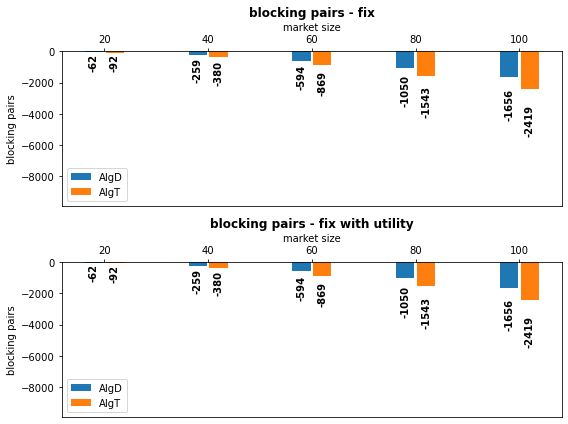

In [12]:
rows, cols = 2,1
titles = ['fix', 
          #'Shuffle', 
          'fix with utility'
          #, 'Shuffle with utility'
         ]

fig, ax = plt.subplots(2,1,figsize=(8,6))

#Change below for "x-ticks"/bar groups
n = [20,40,60,80,100]
width = 3.5

labelss = ['fix', 'fix with utility']


F1P = np.array(summary_fix.loc[summary_fix['Alg']=='AlgD']['avg_Blocking_Pairs'])
F2P = np.array(summary_fix.loc[summary_fix['Alg']=='AlgT']['avg_Blocking_Pairs'])
S1P = np.array(summary_fix_w.loc[summary_fix_w['Alg']=='AlgD']['avg_Blocking_Pairs'])
S2P = np.array(summary_fix_w.loc[summary_fix_w['Alg']=='AlgT']['avg_Blocking_Pairs'])


for i in range(rows):

    rects1 = ax[i].bar(n[0] - 2, -F1P[0], width, label='AlgD', color='#1f77b4')
    rects2 = ax[i].bar(n[0] + 2, -F2P[0], width, label='AlgT', color='#ff7f0e')
    rects3 = ax[i].bar(n[1] - 2, -F1P[1], width, label='AlgD', color='#1f77b4')
    rects4 = ax[i].bar(n[1] + 2, -F2P[1], width, label='AlgT', color='#ff7f0e')

    rects5 = ax[i].bar(n[2] - 2, -F1P[2], width, label='AlgD', color='#1f77b4')
    rects6 = ax[i].bar(n[2] + 2, -F2P[2], width, label='AlgT', color='#ff7f0e')
    rects7 = ax[i].bar(n[3] - 2, -F1P[3], width, label='AlgD', color='#1f77b4')
    rects8 = ax[i].bar(n[3] + 2, -F2P[3], width, label='AlgT', color='#ff7f0e')

    rects9 = ax[i].bar(n[4] - 2, -F1P[4], width, label='AlgD', color='#1f77b4')
    rects10 = ax[i].bar(n[4] + 2, -F2P[4], width, label='AlgT', color='#ff7f0e')

    autolabel2(rects1,i)
    autolabel2(rects2,i)
    autolabel2(rects3,i)
    autolabel2(rects4,i)
    autolabel2(rects5,i)
    autolabel2(rects6,i)
    autolabel2(rects7,i)
    autolabel2(rects8,i)
    autolabel2(rects9,i)
    autolabel2(rects10,i)

    #Change below for y axis title
    ax[i].set_ylabel('blocking pairs')
    
    #Change below for x axis title
    ax[i].set_xlabel('market size')
    ax[i].xaxis.set_label_position('top')
    
    #change below and entries in the titles array (see top) for row title
    ax[i].set_title(f'blocking pairs - {titles[i]}', fontweight="bold")
    
    ax[i].set_xticks(n)
    ax[i].set_xticklabels(n)
    ax[i].set_ylim(-9900, 0)
    ax[i].legend()
    ax[i].xaxis.set_ticks_position('top')

    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles=handles[:2], labels=labels[:2], loc='lower left')

    
fig.tight_layout()
plt.savefig(f'./results/blocking_pairs.png')



plt.show()

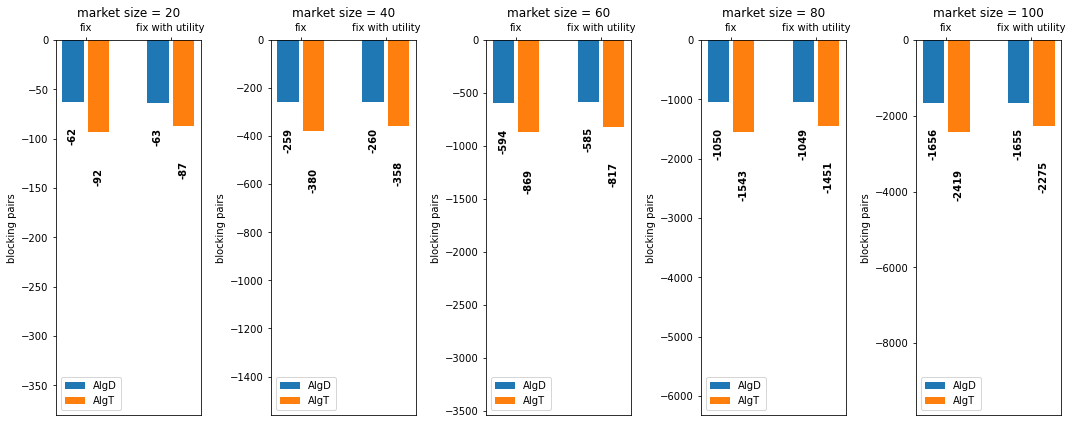

In [13]:
cols = 5
n = [20,40,60,80,100]
width = 0.25

#Change below for bar group title
labels = ['fix', 'fix with utility']

fig, axarr = plt.subplots(1,5,figsize=(15,6))

F1P = np.array(summary_fix.loc[summary_fix['Alg']=='AlgD']['avg_Blocking_Pairs'])
F2P = np.array(summary_fix.loc[summary_fix['Alg']=='AlgT']['avg_Blocking_Pairs'])
S1P = np.array(summary_fix_w.loc[summary_fix_w['Alg']=='AlgD']['avg_Blocking_Pairs'])
S2P = np.array(summary_fix_w.loc[summary_fix_w['Alg']=='AlgT']['avg_Blocking_Pairs'])

x = np.arange(len(labels))

for col in range(cols):
    ax = axarr[col]
    rects1 = ax.bar(x[0]-0.15, -F1P[col], width, label='AlgD', color='#1f77b4')
    rects2 = ax.bar(x[0]+0.15, -F2P[col], width, label='AlgT', color='#ff7f0e')
    rects3 = ax.bar(x[1]-0.15, -S1P[col], width, label='AlgD', color='#1f77b4')
    rects4 = ax.bar(x[1]+0.15, -S2P[col], width, label='AlgT', color='#ff7f0e')

    #Change below for y axis title
    ax.set_ylabel('blocking pairs')
    
    #change below for x axis title
    ax.set_title(f'market size = {n[col]}')
    
    ax.set_xticks([0,1])
    ax.set_xticklabels(labelss)
    ax.set_ylim(-n[col]*(n[col]-1),0)
    ax.legend()
    ax.xaxis.set_ticks_position('top')
        
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[:2], labels=labels[:2])
    
    autolabel1(rects1)
    autolabel1(rects2)
    autolabel1(rects3)
    autolabel1(rects4)


    
fig.tight_layout()
plt.savefig(f'./results/blocking_pairs2.png')
plt.show()

# C. Scalability

The following part analyzes the results from the runtime experiment. First, we read the results from the .csv file.

In [14]:
df_run_time = pd.read_csv(f'./results/run_time.csv')
df_run_time

,Unnamed: 0,n=,Run Time All in s,Run Time Matching in s,Run Time Pref in s,Run Time Preference Generation in %,Run Time ALG in %
0,0,100,0.022987,0.012568,0.010419,45%,55%
1,1,200,0.146034,0.089624,0.056410,39%,61%
2,2,400,0.908979,0.569377,0.339601,37%,63%
3,3,600,2.874459,1.875306,0.999152,35%,65%
4,4,800,6.488023,4.302448,2.185576,34%,66%
5,5,1000,12.425256,8.415219,4.010036,32%,68%
6,6,2000,94.423119,66.232661,28.190458,30%,70%
7,7,4000,727.767596,518.957254,208.810342,29%,71%
8,8,6000,2462.441035,1769.381228,693.059807,28%,72%
9,9,8000,5722.932715,4105.598427,1617.334290,28%,72%


## 1. Run Time Total

In a next step, the total run time is plotted.

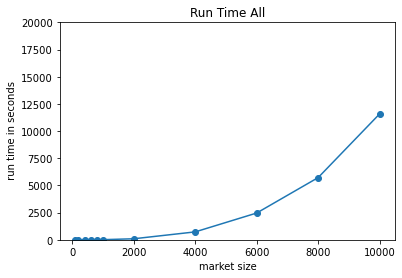

In [21]:
x = df_run_time['n=']
y = df_run_time['Run Time All in s']
plt.plot(x, y, '-o')

#Change below for x axis title
plt.xlabel('market size')

#Change below for y axis value range
plt.ylim(0,20000)

#Change below for y axis title
plt.ylabel(' run time in seconds')

#Change below for title
plt.title('Run Time All')

fig.tight_layout()
plt.savefig(f'./results/scalability1.png')

plt.show()

## 2. Run Time Splitted

Here, we splitted the run time plot by matching and benchmark generation.

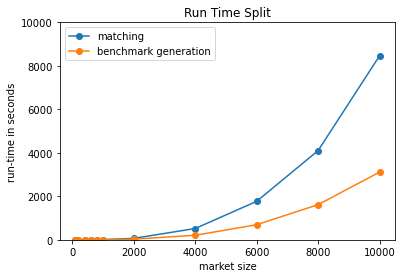

In [22]:
x = df_run_time['n=']
y = df_run_time['Run Time Matching in s']
z = df_run_time['Run Time Pref in s']

plt.plot(x, y, '-o',label='matching')
plt.plot(x, z, '-o',label='benchmark generation')

#Change below for x axis title
plt.xlabel('market size')

#Change below for y axis value range 
plt.ylim(0,10000)

#Change below for x axis title
plt.ylabel('run-time in seconds')

#Change below for title
plt.title('Run Time Split')

plt.legend(loc="upper left")

fig.tight_layout()
plt.savefig(f'./results/scalability2.png')


plt.show()

## 3. Run Time Benchmark Generation

This graphs highlights the run time of benchmark generation.

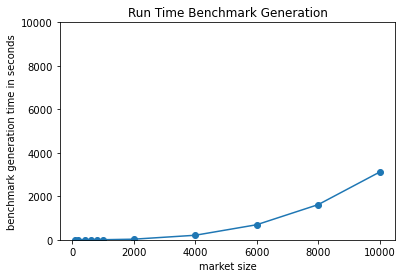

In [17]:
x = df_run_time['n=']
y = df_run_time['Run Time Pref in s']
plt.plot(x, y, '-o')

#Change below for x axis title
plt.xlabel('market size')

#Change below for y axis value range
plt.ylim(0,10000)

#Change below for y axis title
plt.ylabel('benchmark generation time in seconds')

#Change below for title
plt.title('Run Time Benchmark Generation')

fig.tight_layout()
plt.savefig(f'./results/scalability3.png')

plt.show()

## 4. Stacked Preference Generation and ALG

An alternative presentation form with stacked bar charts for Run Time Splitted.

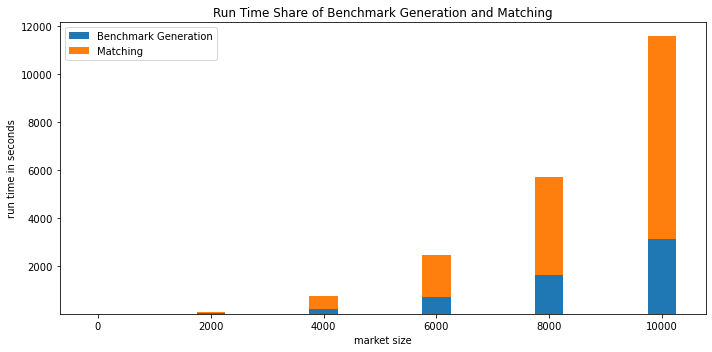

In [18]:
x = df_run_time['n=']
y_1 = df_run_time['Run Time Pref in s']
y_2 = df_run_time['Run Time Matching in s']

width = 500    # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x, y_1, width, label='Benchmark Generation')
ax.bar(x, y_2, width, bottom=y_1,
       label='Matching')

#Change below for x axis title
ax.set_xlabel('market size')

#Change below for y axis title
ax.set_ylabel('run time in seconds')

#Change below for title
ax.set_title('Run Time Share of Benchmark Generation and Matching')

fig.tight_layout()
plt.savefig(f'./results/scalability4.png')


ax.legend()

plt.show()

## 5. Run Time Share Table

Finally, this table summarizes the run time share of preference generation vs. matching.

In [ ]:
df_run_share = df_run_time[['n=','Run Time Preference Generation in %', 'Run Time ALG in %']]
df_run_share